# Seasonal dummy features to capture seasonality

In this notebook we will show how to create seasonal dummy features and how we can add them to our forecasting pipeline. Seasonal dummy features are helpful to use with linear models.

In [1]:
import datetime
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context("talk")

# Data set synopsis

We will use the Victoria electricity demand dataset found here: 
https://github.com/tidyverts/tsibbledata/tree/master/data-raw/vic_elec. This dataset is used in the [original MSTL paper [1]](https://arxiv.org/pdf/2107.13462.pdf). It is the total electricity demand at a half hourly granularity for the state of Victora in Australia from 2002 to the start of 2015. A more detailed description of the dataset can be found [here](https://rdrr.io/cran/tsibbledata/man/vic_elec.html). 

We resampled the dataset to hourly in the 4th data preparation notebook in the "01-Create-Datasets" folder in this repo. For instructions on how to download, prepare, and store the dataset, refer to notebook number 4, in the folder "01-Create-Datasets" from this repo.

## References
[1] [K. Bandura, R.J. Hyndman, and C. Bergmeir (2021)
    MSTL: A Seasonal-Trend Decomposition Algorithm for Time Series with Multiple
    Seasonal Patterns. arXiv preprint arXiv:2107.13462.](https://arxiv.org/pdf/2107.13462.pdf)

# Load data

In [2]:
data = pd.read_csv(
    "../Datasets/victoria_electricity_demand.csv",
    usecols=["demand", "date_time"],
    parse_dates=["date_time"],
    index_col=["date_time"],
)

In [3]:
data.shape

(115368, 1)

The data is relatively large compared to the other datasets we have been working with. If the rest of this notebook runs too slowly on your laptop try filtering to a recent segment of the data. For example by running:

```Python
# Filter to the previous 3 years of the dataset
data = data.loc["2012":]
```

## Plot the data

There time series is high frequency and over a long period. Let's plot the previous three years.

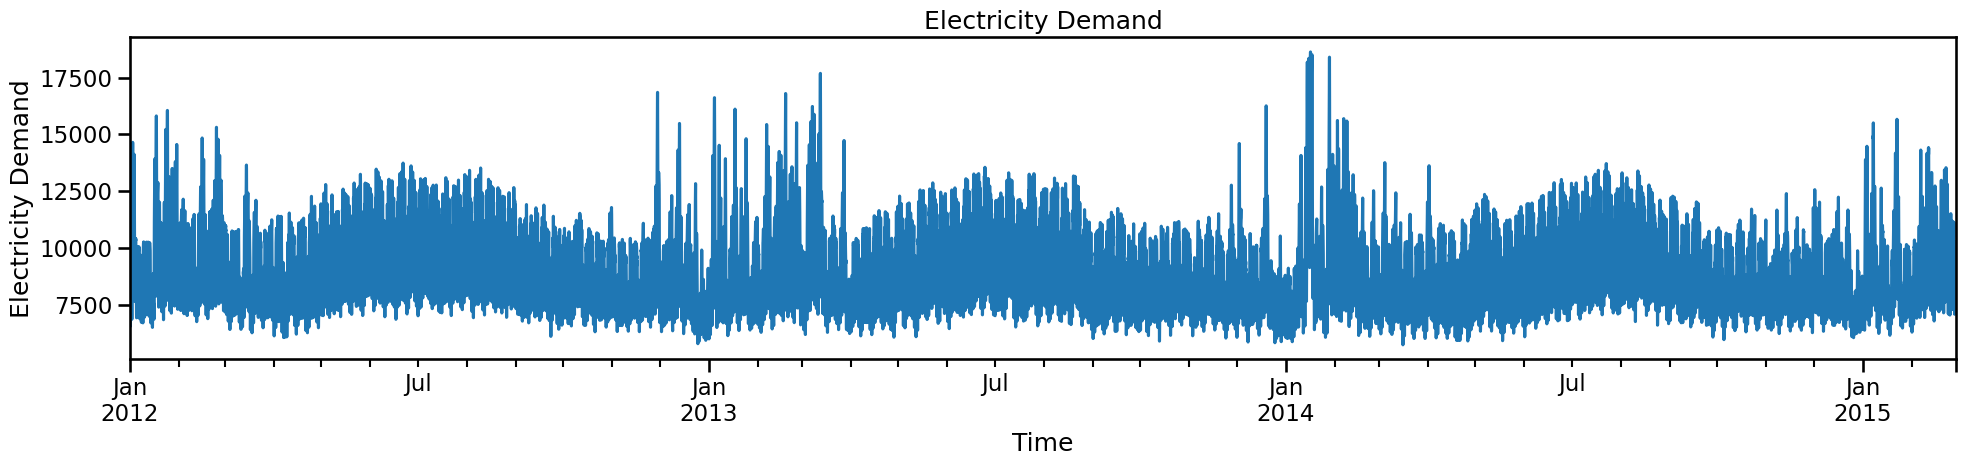

In [4]:
fig, ax = plt.subplots(figsize=[20, 5])
data.loc["2012":].plot(y="demand", legend=None, ax=ax)
ax.set_xlabel("Time")
ax.set_ylabel("Electricity Demand")
ax.set_title("Electricity Demand")
plt.tight_layout()

# Using sklearn to create dummy features
One hot encoded features

In [5]:
from sklearn.preprocessing import OneHotEncoder

# Let's ensure all sklearn transformers output pandas dataframes
from sklearn import set_config
set_config(transform_output="pandas")  

In [6]:
df = data.copy()

Let's create some features from the date.

In [7]:
# Create datetime features
df["month_of_year"] = df.index.month
df["week_of_year"] = df.index.isocalendar().week

Create the one hot encoder transformer.

In [8]:
transformer = OneHotEncoder(sparse_output=False, # Required to enable
                                                 # pandas output.
                            drop="first", # To avoid the dummy variable
                                          # trap we drop the first dummy.
                            )

Create seasonal dummy variables from our date features.

In [9]:
result = transformer.fit_transform(df[["month_of_year", "week_of_year"]])
result.head()

,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,...,week_of_year_44.0,week_of_year_45.0,week_of_year_46.0,week_of_year_47.0,week_of_year_48.0,week_of_year_49.0,week_of_year_50.0,week_of_year_51.0,week_of_year_52.0,week_of_year_53.0
date_time,,,,,,,,,,,,,,,,,,,,,
2002-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Creating seasonal dummies using sklearn and sktime

Let's combine the `DateTimeFeatures` transformer from sktime with `OneHotEncoder` inside of a pipeline to make it easier to create seasonal dummy features.

In [10]:
from sktime.transformations.series.date import DateTimeFeatures
from sklearn.pipeline import make_pipeline

In [11]:
# Specify which datetime features to create 
# and then convert into dummy/one hot features.
seasonal_dummies = ["week_of_year","month_of_year"]


# Create the DateTimeFeatures transformer
datetime_transformer = DateTimeFeatures(manual_selection=seasonal_dummies, # Select which features to
                                                                           # create
                                       keep_original_columns=False, # Flag if we want to keep columns
                                                                    # in dataframe passed to `transform`.
                                      )

# One hot encoder
one_hot_encoder = OneHotEncoder(sparse_output=False, # Required to enable
                                                     # pandas output.
                                drop="first"
                               )

# Combine the two transformers in a pipeline
seasonal_dummies_feats = make_pipeline(datetime_transformer, one_hot_encoder)
seasonal_dummies_feats

Pipeline(steps=[('datetimefeatures',
                 DateTimeFeatures(manual_selection=['week_of_year', 'month_of_year'])),
                ('onehotencoder',
                 OneHotEncoder(drop='first', sparse_output=False))])

In [12]:
# Fit and transform to create our features
result = seasonal_dummies_feats.fit_transform(data)
result.head()

,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,...,week_of_year_44,week_of_year_45,week_of_year_46,week_of_year_47,week_of_year_48,week_of_year_49,week_of_year_50,week_of_year_51,week_of_year_52,week_of_year_53
date_time,,,,,,,,,,,,,,,,,,,,,
2002-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Let's build some forecasts!

Let's build a recursive forecast and see how our seasonal dummy features can help capture seasonality.

In [13]:
# Require OneHotEncoder to create seasonal dummy variables
from sklearn.preprocessing import OneHotEncoder

# --- The transformers from earlier in the course. --- #
# Date time features to capture seasonality
from sktime.transformations.series.date import DateTimeFeatures
# Lag and window features
from sktime.transformations.series.summarize import WindowSummarizer
# Time features for trend 
from sktime.transformations.series.time_since import TimeSince
from sklearn.preprocessing import PolynomialFeatures
# Rescaling transformer for linear models with regularisation
from sklearn.preprocessing import MinMaxScaler
# Pipelines to create feature engineering pipeline
from sklearn.pipeline import make_pipeline, make_union
# Used to reset sklearn estimators
from sklearn.base import clone

# Let's ensure all sklearn transformers output pandas dataframes
from sklearn import set_config
set_config(transform_output="pandas")  # Upgrade to scikit-learn 0.12
                                       # for this feature

In [14]:
df = data.copy()
df.head()

,demand
date_time,
2002-01-01 00:00:00,6919.366092
2002-01-01 01:00:00,7165.974188
2002-01-01 02:00:00,6406.542994
2002-01-01 03:00:00,5815.537828
2002-01-01 04:00:00,5497.732922


Specify target name.

In [15]:
target=["demand"] # Note: it's in a list.
                  # This ensures we'll get
                  # a dataframe when using df.loc[:, target]
                  # rather than a pandas Series. 
                  # This can also be useful if we have
                  # multiple targets.

Prepare our transformers.

In [16]:
### Polynomial time features for trend ###

time_feats = make_pipeline(
                           # make time since features    
                           TimeSince(), 
                           # then translate it into polynomial features
                           # (for capture non-linear trends)
                           PolynomialFeatures(degree=1, include_bias=False)
                          )



### Create the seasonal dummies transformer. ###

# Specify which datetime features to create
# dummies with.
datetime_features = [
    "month_of_year", # for capture yearly seasionality
    "day_of_week",   # for capture weekly seasionality
    "hour_of_day"    # for capture daily seasionality
]

datetime_feats = DateTimeFeatures(
    manual_selection=datetime_features,                               
    keep_original_columns=False
)

one_hot_encoder = OneHotEncoder(
    sparse_output=False, # Required to enable pandas output.
    drop="first"
)

seasonal_dummies_feats = make_pipeline(datetime_feats, one_hot_encoder)



### lag & windoes features ###

# Features computed from the target.
# Compute lag and window features.
lag_window_feats = WindowSummarizer(
    lag_feature={
        "lag": [1]  # Lag features.
    },
    target_cols=target,
    truncate="bfill",  # Backfill missing values from lagging and windowing.
)

Create a pipeline to create all our features.

In [17]:
pipeline = make_union(
    seasonal_dummies_feats,
    time_feats, 
    lag_window_feats,
)

# Apply min-max scaling to all the features
pipeline = make_pipeline(pipeline, MinMaxScaler())

In [18]:
pipeline

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('datetimefeatures',
                                                                  DateTimeFeatures(manual_selection=['month_of_year', 'day_of_week',
                                   'hour_of_day'])),
                                                                 ('onehotencoder',
                                                                  OneHotEncoder(drop='first',
                                                                                sparse_output=False))])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('timesince',
                                                                  TimeSince()),
                                                                 ('polynomialfeatures',
                                                                  PolynomialFeatures(degree=1,
                                                                                     include_bias=False))])),
                                                ('windowsummarizer',
                                                 WindowSummarizer(lag_feature={'lag': [1]}, target_cols=['demand'],
                 truncate='bfill'))])),
                ('minmaxscaler', MinMaxScaler())])

Let's check how our feature engineering pipeline behaves.

In [19]:
# Here, you can see that its create succesfully:
# 1. seasional dummy features (one hot)
# 2. time trend features
# 3. ldg & window features
pipeline.fit_transform(df).head()

,month_of_year_2,month_of_year_3,month_of_year_4,month_of_year_5,month_of_year_6,month_of_year_7,month_of_year_8,month_of_year_9,month_of_year_10,month_of_year_11,...,hour_of_day_16,hour_of_day_17,hour_of_day_18,hour_of_day_19,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23,time_since_2002-01-01 00:00:00,demand_lag_1
date_time,,,,,,,,,,,,,,,,,,,,,
2002-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.112939
2002-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.112939
2002-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000017,0.131101
2002-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000026,0.075171
2002-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000035,0.031645


Let's reset our feature engineering pipeline.

In [20]:
# We can use `clone` to return an unfitted version
# of the pipeline.
pipeline = clone(pipeline)

Let's build a recursive forecast.

We'll start with configuring the model, the forecast start time, the number of steps to forecast, and the forecasting horizon, etc.

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [22]:
# --- CONFIG --- #
# Define time of first forecast, this determines our train / test split.                                              
forecast_start_time = df.index.max() - pd.DateOffset(weeks=2) # Start two weeks from the end.

# Define number of steps to forecast.
num_of_forecast_steps = 24*14 # 2 weeks, this is a lot! Reduce this
                              # if you want the recursive forecast
                              # to run more quickly. 

# Define the model.
model = LinearRegression()

# Create a list of periods that we'll forecast over.
forecast_horizon = pd.date_range(forecast_start_time, 
                                   periods=num_of_forecast_steps,
                                   freq="H")

# How much data in the past is needed to create our features
look_back_window_size = pd.DateOffset(weeks=1) # We need the latest 24*7 time periods
                                             # in our predict dataframe to build our 
                                             # window features.

Let's create our training dataframe.

In [23]:
# --- CREATE TRAINING & TESTING DATAFRAME  --- #
# Ensure we only have training data up to the start
# of the forecast.
df_train = df.loc[df.index < forecast_start_time].copy() # train dataframe
df_test = df.loc[df.index >= forecast_start_time].copy() # test dataframe

Let's compute our `X_train` and `y_train` and fit our model!

In [24]:
# --- FEATURE ENGINEERING--- #
# Create X_train and y_train
y_train = df_train[target]
X_train = pipeline.fit_transform(df_train)

# LightGBM cannot handle column names which have
# certain characters (e.g., ":"). We replace these
# with `_`. 
if "lightgbm" in model.__module__: # checks if model is from lightgbm
    X_train = X_train.rename(columns = lambda x:re.sub("[^A-Za-z0-9_]+", "_", x))


# --- MODEL TRAINING---#
# Train one-step ahead forecast model
model.fit(X_train, y_train)

LinearRegression()

Let's prepare the dataframe that we will pass to `model.predict()`. This will contain some portion of time series during the training period so we can create any features that require historic data.

In [25]:
# --- CREATE DYNAMIC PREDICTION DATAFRAME  --- #
# We will recursively append our forecasts to this 
# dataframe and re-compute our lag and window features from the
# target in this dataframe. It contains data in both the training period 
# and forecast period which is needed for some transformers (e.g., lags and windows).
look_back_start_time = forecast_start_time - look_back_window_size

# Create `df_predict` which has data going as far back
# as needed to create features which need past values.
df_predict = df_train.loc[look_back_start_time:].copy()

# Extend index into forecast horizon
df_predict = pd.concat([
                  df_predict,
                  pd.DataFrame(index=forecast_horizon)
                 ])

Let's recursively create `X_test` and make our predictions and append them to the `df_predict` dataframe.

In [26]:
# --- RECURSIVE FORECASTING LOOP --- #
for forecast_time in forecast_horizon:    
    # Compute features during the forecast horizon
    X_test = pipeline.transform(df_predict)
    X_test = X_test.loc[[forecast_time]] 

    # Predict one step ahead. 
    y_pred = model.predict(X_test)
    
    # Append forecast to the target variable columnn in our
    # dynamic forecast dataframe `df_predict`. This `df_predict`
    # is ready for the next iteration where we will re-compute
    # features derived from the target such as lags and windows.
    df_predict.loc[[forecast_time], target] = y_pred

Let's retrieve our forecast and actuals during the forest horizon.

In [27]:
# --- GET FORECAST AND TEST VALUES --- #    
y_forecast = df_predict.loc[forecast_horizon, target]
y_test = df_test.loc[forecast_start_time:, target]

Let's create predictions on the training set using our one step ahead forecast model. This is useful to plot when debugging models.

In [28]:
# --- CREATE IN-SAMPLE PREDICTIONS--- #
y_forecast_train = model.predict(X_train)
y_forecast_train = pd.DataFrame(y_forecast_train, index=X_train.index, columns=target)

Let's plot the forecast!

Text(0.5, 1.0, 'Recursive forecast with LinearRegression()')

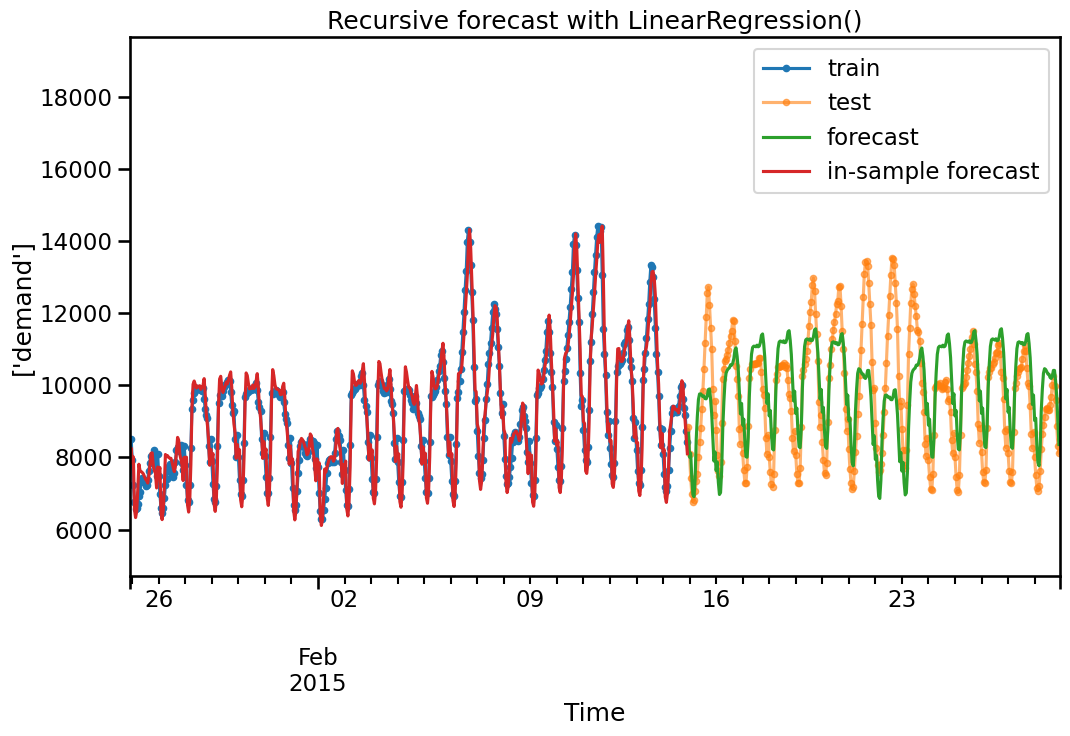

In [29]:
# --- PLOTTING --- #
# Plot the forecast.
fig, ax = plt.subplots(figsize=[12, 7])

# Plot training set.
y_train.plot(ax=ax, marker='.')
# Plot actuals in forecasting horizon.
y_test.plot(ax=ax, marker='.', alpha=0.6)
# Plot forecast.
y_forecast.plot(ax=ax)
# Plot 1 step forecasts in training data.
y_forecast_train.plot(ax=ax)

ax.legend(["train", "test", "forecast", "in-sample forecast"])
ax.set_xlim(xmin=y_train.index.max() - pd.DateOffset(weeks=3))
ax.set_xlabel("Time")
ax.set_ylabel(f"{target}")
ax.set_title(f"Recursive forecast with {model}")

Let's compute the RMSE of this forecast.

In [30]:
# Compute error metrics.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_test.loc[y_forecast.index],
                   y_pred=y_forecast,
                   squared=False)

1210.143113549276